In [1]:
import pandas as pd
import numpy as np
import re
from nltk.stem import WordNetLemmatizer
import nltk
import fasttext

import matplotlib
import matplotlib.pyplot as plt


# Data Analysis

## EDA articles

In [2]:
articles = pd.read_csv('./articles.csv/articles.csv')
articles.head(5)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [3]:
articles.info() 
#결측값 존재 x
#article_id값에 따른 다양한 값들 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [22]:
articles.isnull().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

In [4]:
articles.nunique()

article_id                      105542
product_code                     47224
prod_name                        45875
product_type_no                    132
product_type_name                  131
product_group_name                  19
graphical_appearance_no             30
graphical_appearance_name           30
colour_group_code                   50
colour_group_name                   50
perceived_colour_value_id            8
perceived_colour_value_name          8
perceived_colour_master_id          20
perceived_colour_master_name        20
department_no                      299
department_name                    250
index_code                          10
index_name                          10
index_group_no                       5
index_group_name                     5
section_no                          57
section_name                        56
garment_group_no                    21
garment_group_name                  21
detail_desc                      43404
dtype: int64

In [5]:
ohe_columns = ['product_group_name', 'graphical_appearance_no','perceived_colour_master_id', 'index_code', \
               'garment_group_no'] #원핫 인코딩
emb_columns = ['product_type_name', 'department_name', 'colour_group_name', 'section_name', 'detail_desc'] #text based data 임베딩

## Preprocess articles

### emb_columns (text based feature)

**불용어 처리, 표제어 추출 활용해 전처리 후 fasttext 활용 임베딩**

In [6]:
articles[['article_id']+emb_columns]

,article_id,product_type_name,department_name,colour_group_name,section_name,detail_desc
0,108775015,Vest top,Jersey Basic,Black,Womens Everyday Basics,Jersey top with narrow shoulder straps.
1,108775044,Vest top,Jersey Basic,White,Womens Everyday Basics,Jersey top with narrow shoulder straps.
2,108775051,Vest top,Jersey Basic,Off White,Womens Everyday Basics,Jersey top with narrow shoulder straps.
3,110065001,Bra,Clean Lingerie,Black,Womens Lingerie,"Microfibre T-shirt bra with underwired, moulde..."
4,110065002,Bra,Clean Lingerie,White,Womens Lingerie,"Microfibre T-shirt bra with underwired, moulde..."
...,...,...,...,...,...,...
105537,953450001,Socks,Socks Bin,Black,Men Underwear,Socks in a fine-knit cotton blend with a small...
105538,953763001,Vest top,Jersey,Black,H&M+,Loose-fitting sports vest top in ribbed fast-d...
105539,956217002,Dress,Jersey,Black,Womens Trend,"Short, A-line dress in jersey with a round nec..."
105540,957375001,Hair clip,Small Accessories,Black,Divided Accessories,Large plastic hair claw.


In [7]:
stopwords = set(nltk.corpus.stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [8]:
def preprocess(x):
    x = ' '+x+' '
    x = x.lower()
    
    # remove digits
    x = re.sub(r'\d+\-\d+', ' ', x)
    x = re.sub(r'\d+\.\d+', ' ', x)
    x = re.sub(r'\d+/\d+', ' ', x)
    x = re.sub(r'\d+', ' ', x)
    # remove everything in braces
    x = re.sub(r'\(.+?\)', ' ', x)
    
    x = re.sub(r' cm ', ' ', x)
    x = re.sub(r' denier ', ' ', x)
    x = re.sub(r' t\-shirt ', ' tshirt ', x)
    x = re.sub(r'(\w+)(\+)', r'\1 plus', x)
    # remove everything except letters
    x = re.sub(r'[^a-z\s]', ' ', x)
    tokens = x.strip().split()
    tokens = ' '.join([lemmatizer.lemmatize(token) for token in tokens if token not in stopwords])
    return tokens

s = '5-pocket slim-fit t-shirt h&m+'
preprocess(s)

'pocket slim fit tshirt h plus'

In [9]:
from tqdm import tqdm
tqdm.pandas()
articles['desc_full'] = articles['product_type_name']+' '+articles['department_name']+' '\
                        +articles['colour_group_name']+' '+articles['section_name']+' '\
                        +articles['detail_desc'].fillna(' ')
articles['desc_full_prep'] = articles['desc_full'].progress_apply(preprocess)

100%|████████████████████████████████████████████████████████████████████████| 105542/105542 [00:18<00:00, 5640.60it/s]


In [10]:
texts = articles['desc_full_prep'].unique().tolist()
with open('texts_normalized.txt', 'w') as f:
    for text in texts:
        f.write(text)
        f.write('\n')

In [12]:
fasttext_model = fasttext.train_unsupervised('texts_normalized.txt', minn=2, maxn=5, dim=200)

In [13]:
doc2vec_dict = {}
for row in articles[['article_id', 'desc_full_prep']].itertuples():
    doc2vec_dict[row[1]] = fasttext_model.get_sentence_vector(row[2])

In [14]:
emb_features = np.array(list(doc2vec_dict.values()))
emb_features.shape

(105542, 200)

### ohe_columns

**one hot encoding for categorical feature**

In [15]:
articles[['article_id']+ohe_columns]

,article_id,product_group_name,graphical_appearance_no,perceived_colour_master_id,index_code,garment_group_no
0,108775015,Garment Upper body,1010016,5,A,1002
1,108775044,Garment Upper body,1010016,9,A,1002
2,108775051,Garment Upper body,1010017,9,A,1002
3,110065001,Underwear,1010016,5,B,1017
4,110065002,Underwear,1010016,9,B,1017
...,...,...,...,...,...,...
105537,953450001,Socks & Tights,1010014,5,F,1021
105538,953763001,Garment Upper body,1010016,5,A,1005
105539,956217002,Garment Full body,1010016,5,A,1005
105540,957375001,Accessories,1010016,5,D,1019


In [16]:
ohe_features = pd.get_dummies(articles[ohe_columns].astype(str)).astype(int).values
ohe_features.shape

(105542, 100)

**concat emb_feature and ohe_feature**

In [17]:
articles_features = np.concatenate([emb_features, ohe_features], axis=1)
articles_features.shape

(105542, 300)

In [18]:
articles_features_with_id = {}
for article_id, features in zip(articles['article_id'].values, articles_features):
    articles_features_with_id[article_id] = features

## EDA customers

In [5]:
customers = pd.read_csv('./customers.csv/customers.csv')

In [20]:
customers.head(5)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [21]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [22]:
customers.nunique()

customer_id               1371980
FN                              1
Active                          1
club_member_status              3
fashion_news_frequency          4
age                            84
postal_code                352899
dtype: int64

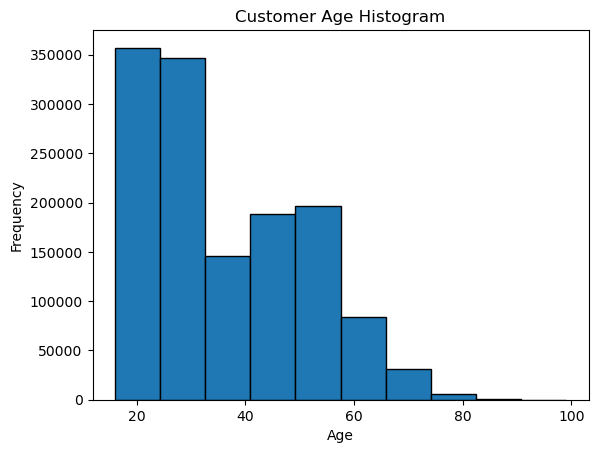

In [23]:
plt.hist(customers["age"], edgecolor = 'black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Customer Age Histogram')
plt.show()

<Axes: title={'center': 'Inactive/Active (0/1) users'}>

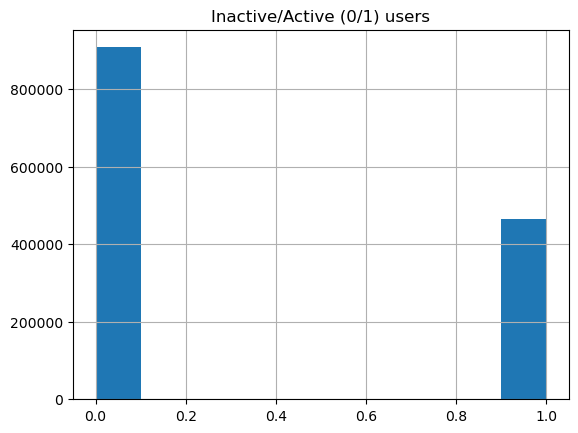

In [32]:
# Analyzing the activity of the users.
customers["Active"] = customers["Active"].fillna(0)

plt.title("Inactive/Active (0/1) users")
customers["Active"].hist()

## Preprocess customers

In [24]:
#결측값 처리
customers[['FN', 'Active']] = customers[['FN', 'Active']].fillna(0).astype(int)
customers[['club_member_status', 'fashion_news_frequency']] = customers[['club_member_status', \
                                                                         'fashion_news_frequency']].fillna('NONE')

In [25]:
customers['age'] = customers['age'].fillna(customers['age'].mean())

bins = [16, 20, 25, 30, 40, 50, 60, 100]
labels = [1,2,3,4,5,6,7]
customers['age_bins'] = pd.cut(customers['age'], bins=bins, labels=labels)
customers

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,age_bins
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0,0,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,5
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0,0,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,2
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0,0,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,2
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0,0,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...,6
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1,1,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,6
...,...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0,0,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...,2
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0,0,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...,2
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1,1,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...,2
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1,1,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...,1


In [26]:
ohe_columns = ['club_member_status', 'fashion_news_frequency', 'age_bins']
ohe_features = pd.get_dummies(customers[ohe_columns].astype(str)).astype(int)
customer_features = pd.concat([customers[['FN', 'Active']], ohe_features], axis=1).values
customer_features.shape

(1371980, 18)

In [27]:
customer_features_with_id = {}
for customer_id, features in zip(customers['customer_id'].values, customer_features):
    customer_features_with_id[customer_id] = features

## EDA transactions

In [13]:
transactions = pd.read_csv('./transactions_train.csv/transactions_train.csv')

In [29]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


<Axes: >

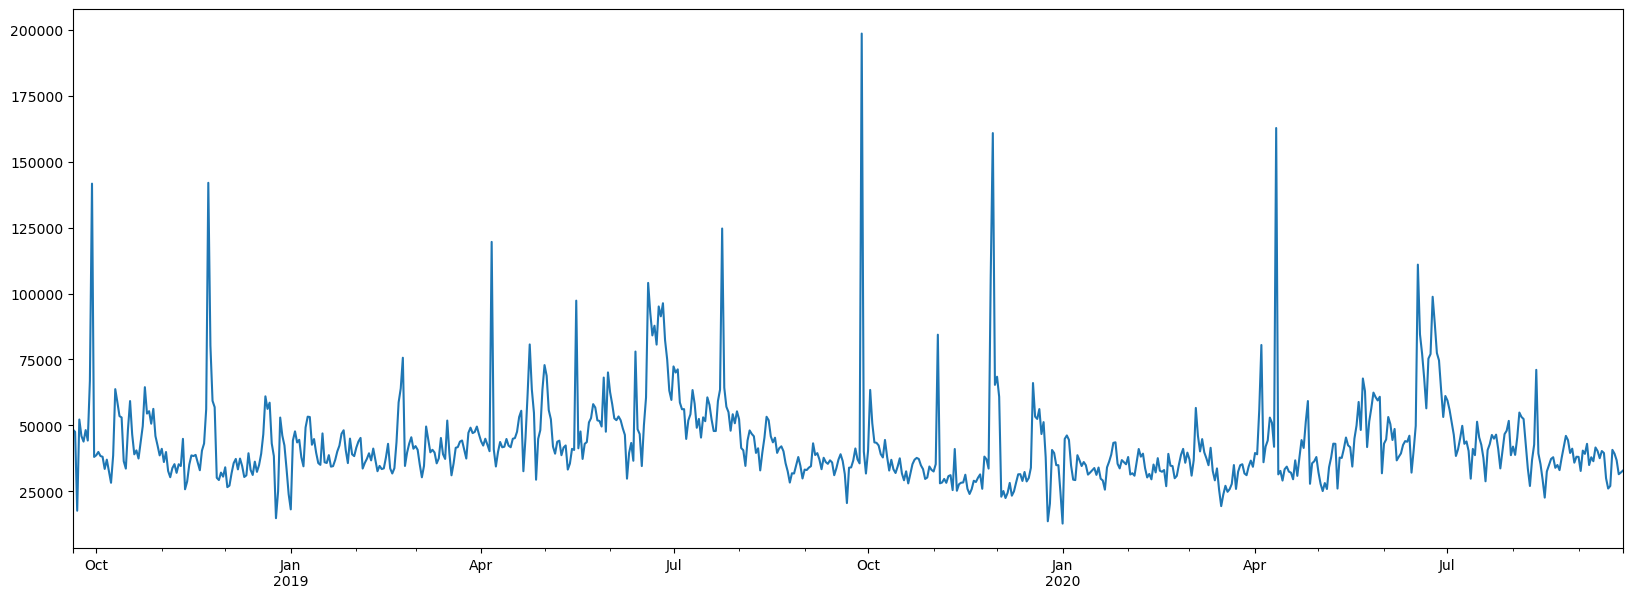

In [30]:
pd.to_datetime(transactions['t_dat']).value_counts().sort_index().plot(kind='line', figsize=(20, 7))

# Neural Network Collaborative Filtering

## Train test split

In [31]:
from datetime import datetime, timedelta
max_date = transactions['t_dat'].max()

# keep one last 1 day for test dataset
end_train_date = datetime.strptime(max_date, '%Y-%M-%d') - timedelta(days=1)
end_train_date = end_train_date.strftime('%Y-%M-%d')
end_train_date

'2020-09-21'

In [32]:
transactions_train = transactions[transactions['t_dat']<=end_train_date]
transactions_test = transactions[transactions['t_dat']>end_train_date]
transactions_train.shape, transactions_test.shape

((31755458, 5), (32866, 5))

In [33]:
articles_ids = pd.Series(list(articles_features_with_id.keys()))
def create_zero_target(transactions_df_grouped):
    cutomers_lst = []
    articles_lst = []
    for row in transactions_df_grouped[['customer_id', 'article_id']].itertuples():
        customer_id, article_ids = row[1], row[2]
        unord_article_id = articles_ids[~articles_ids.isin(article_ids)].sample(50)
        cutomers_lst.append(customer_id)
        articles_lst.append(unord_article_id)
    df = pd.DataFrame({'customer_id':cutomers_lst, 'article_id':articles_lst, 'target':[0]*len(cutomers_lst)}).\
                                                                                            explode('article_id')
    return df

## Create test dataset

In [34]:
transactions_test['target'] = 1

C:\Users\one\AppData\Local\Temp\ipykernel_32704\1659739533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_test['target'] = 1


In [35]:
transactions_test_grouped = transactions_test.drop(['article_id'], axis=1).\
                                                    merge(transactions[['customer_id', 'article_id']], \
                                                    how='left', on='customer_id').\
                                                    groupby('customer_id')['article_id'].apply(lambda x: \
                                                                                        list(set(x))).reset_index()
zero_test_target = create_zero_target(transactions_test_grouped)
test = pd.concat([transactions_test, zero_test_target])[['customer_id', 'article_id', 'target']].\
                                                                    sort_values(by='customer_id').reset_index(drop=True)
test

,customer_id,article_id,target
0,0003e867a930d0d6842f923d6ba7c9b77aba33fe2a0fbf...,827487003,1
1,0003e867a930d0d6842f923d6ba7c9b77aba33fe2a0fbf...,815291001,0
2,0003e867a930d0d6842f923d6ba7c9b77aba33fe2a0fbf...,510398012,0
3,0003e867a930d0d6842f923d6ba7c9b77aba33fe2a0fbf...,820184001,0
4,0003e867a930d0d6842f923d6ba7c9b77aba33fe2a0fbf...,574198005,0
...,...,...,...
559261,fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20...,593829002,0
559262,fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20...,637531003,0
559263,fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20...,738929001,0
559264,fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20...,876444001,0


In [36]:
test_customer_features = np.array([customer_features_with_id[customer_id] for customer_id in \
                                   test['customer_id'].values])
test_article_features = np.array([articles_features_with_id[article_id] for article_id in \
                                  test['article_id'].values])
test_target = test['target'].values
test_customer_features.shape, test_article_features.shape, test_target.shape

((559266, 18), (559266, 300), (559266,))

## Create train dataset

In [37]:
transactions_train_grouped = transactions_train.groupby('customer_id')['article_id'].apply(lambda x: len(set(x)))
selected_customers = transactions_train_grouped[transactions_train_grouped>10].sample(20000, random_state=1).index.values
transactions_train = transactions_train[transactions_train['customer_id'].isin(selected_customers)]
transactions_train.shape

(932082, 5)

In [38]:
transactions_train['t_dat'] = pd.to_datetime(transactions_train['t_dat'])
dt_train_max = transactions_train['t_dat'].max()
rating_dict = {x: 0.5**((dt_train_max - x).days/360) for x in transactions_train['t_dat'].unique()}
transactions_train['target'] = transactions_train['t_dat'].map(rating_dict)
transactions_train

,t_dat,customer_id,article_id,price,sales_channel_id,target
89,2018-09-20,00708c3da4d07706d4cad77c6aecc1b1ce33d21d73022c...,255396006,0.067780,2,0.24429
90,2018-09-20,00708c3da4d07706d4cad77c6aecc1b1ce33d21d73022c...,594834010,0.042356,2,0.24429
91,2018-09-20,00708c3da4d07706d4cad77c6aecc1b1ce33d21d73022c...,516712001,0.022017,2,0.24429
93,2018-09-20,00761aefe07a2dd6ca110c99f3856ede55f20ff00ce754...,634015003,0.012186,1,0.24429
94,2018-09-20,00761aefe07a2dd6ca110c99f3856ede55f20ff00ce754...,636351002,0.007610,1,0.24429
...,...,...,...,...,...,...
31755087,2020-09-21,fd5873bd76605e3197d653b338c7fc147c93f195366059...,915529005,0.033881,2,1.00000
31755088,2020-09-21,fd63229e7189ef8731f1584d3a29fd36af4c5853a3ab2b...,936282001,0.025407,2,1.00000
31755313,2020-09-21,ff05ae6e56395fe81a69192c23f054ffda5e69c1ec28b5...,837249002,0.013542,1,1.00000
31755314,2020-09-21,ff05ae6e56395fe81a69192c23f054ffda5e69c1ec28b5...,719957017,0.022017,1,1.00000


In [43]:
transactions_train_grouped = transactions_train.drop(['article_id'], axis=1).\
                                                    merge(transactions[['customer_id', 'article_id']], \
                                                    how='left', on='customer_id').\
                                                    groupby('customer_id')['article_id'].\
                                                    apply(lambda x: list(set(x))).reset_index()

zero_train_target = create_zero_target(transactions_train_grouped)
train = pd.concat([transactions_train, zero_train_target])[['customer_id', 'article_id', 'target']].\
                                                                    sort_values(by='customer_id').reset_index(drop=True)
train = train.iloc[0:30000,:]

In [44]:
train

,customer_id,article_id,target
0,00015c1a121e08bbd2552c15fbbb6e6b19d3bf8f7b6a3d...,669786001,0.485766
1,00015c1a121e08bbd2552c15fbbb6e6b19d3bf8f7b6a3d...,518090005,0.000000
2,00015c1a121e08bbd2552c15fbbb6e6b19d3bf8f7b6a3d...,683667001,0.000000
3,00015c1a121e08bbd2552c15fbbb6e6b19d3bf8f7b6a3d...,873594001,0.000000
4,00015c1a121e08bbd2552c15fbbb6e6b19d3bf8f7b6a3d...,850806001,0.000000
...,...,...,...
29995,03e5f590311e6b584889017fdd32a71e8ce49a4f21b1c0...,589520004,0.000000
29996,03e5f590311e6b584889017fdd32a71e8ce49a4f21b1c0...,657497004,0.000000
29997,03e5f590311e6b584889017fdd32a71e8ce49a4f21b1c0...,573605013,0.000000
29998,03e5f590311e6b584889017fdd32a71e8ce49a4f21b1c0...,814847001,0.000000


In [46]:
train_customer_features = np.array([customer_features_with_id[customer_id] for customer_id in \
                                    train['customer_id'].values])
train_article_features = np.array([articles_features_with_id[article_id] for article_id in \
                                   train['article_id'].values])
train_target = train['target'].values
train_customer_features.shape, train_article_features.shape, train_target.shape

((30000, 18), (30000, 300), (30000,))

In [47]:
del transactions_train
del transactions_train_grouped
del transactions_test
del transactions_test_grouped
import gc
gc.collect()

29

## Train Model

In [48]:
import tensorflow as tf
from tensorflow import keras

num_outputs = 32
tf.random.set_seed(1)
user_NN = tf.keras.models.Sequential([    
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(num_outputs) 
])

item_NN = tf.keras.models.Sequential([   
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_outputs)
])

# create the user input and point to the base network
input_user = tf.keras.layers.Input(shape=(train_customer_features.shape[1]))
vu = user_NN(input_user)
vu = tf.linalg.l2_normalize(vu, axis=1)

# create the item input and point to the base network
input_item = tf.keras.layers.Input(shape=(train_article_features.shape[1]))
vm = item_NN(input_item)
vm = tf.linalg.l2_normalize(vm, axis=1)

# compute the dot product of the two vectors vu and vm
output = tf.keras.layers.Dot(axes=1)([vu, vm])

# specify the inputs and output of the model
model = tf.keras.Model([input_user, input_item], output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 18)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 sequential (Sequential)        (None, 32)           4302        ['input_1[0][0]']                
                                                                                                  
 sequential_1 (Sequential)      (None, 32)           114080      ['input_2[0][0]']                
                                                                                              

In [49]:
class SaveBestModel(tf.keras.callbacks.Callback):
    def __init__(self, save_best_metric='val_loss', this_max=False):
        self.save_best_metric = save_best_metric
        self.max = this_max
        if this_max:
            self.best = float('-inf')
        else:
            self.best = float('inf')

    def on_epoch_end(self, epoch, logs=None):
        metric_value = logs[self.save_best_metric]
        if self.max:
            if metric_value > self.best:
                self.best = metric_value
                self.best_weights = self.model.get_weights()

        else:
            if metric_value < self.best:
                self.best = metric_value
                self.best_weights= self.model.get_weights()
                
save_best_model = SaveBestModel()

In [50]:
tf.random.set_seed(1)
cost_fn = tf.keras.losses.MeanSquaredError()
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,
              loss=cost_fn)

In [51]:
tf.random.set_seed(1)
model.fit([train_customer_features, train_article_features], train_target, epochs=20, \
          validation_data=([test_customer_features, test_article_features], test_target), \
          callbacks=[save_best_model])
#set best weigts
model.set_weights(save_best_model.best_weights)

Epoch 1/20
938/938 [==============================] - 43s 44ms/step - loss: 0.0754 - val_loss: 0.0878
Epoch 2/20
938/938 [==============================] - 32s 34ms/step - loss: 0.0718 - val_loss: 0.0997
Epoch 3/20
938/938 [==============================] - 33s 35ms/step - loss: 0.0700 - val_loss: 0.0837
Epoch 4/20
938/938 [==============================] - 32s 34ms/step - loss: 0.0687 - val_loss: 0.0722
Epoch 5/20
938/938 [==============================] - 33s 35ms/step - loss: 0.0671 - val_loss: 0.0751
Epoch 6/20
938/938 [==============================] - 32s 34ms/step - loss: 0.0658 - val_loss: 0.0809
Epoch 7/20
938/938 [==============================] - 33s 35ms/step - loss: 0.0649 - val_loss: 0.0793
Epoch 8/20
938/938 [==============================] - 32s 35ms/step - loss: 0.0637 - val_loss: 0.0820
Epoch 9/20
938/938 [==============================] - 32s 35ms/step - loss: 0.0623 - val_loss: 0.0707
Epoch 10/20
938/938 [==============================] - 33s 35ms/step - loss: 0.061

In [52]:
del train_customer_features
del train_article_features
del train_target
import gc
gc.collect()

1645

## Make Prediction

In [53]:
predicted_score = model.predict([test_customer_features, test_article_features])

17478/17478 [==============================] - 35s 2ms/step


In [54]:
test['predicted_score'] = predicted_score.reshape(-1)
test_grouped = test.groupby('customer_id').agg({'article_id':list, 'target':list, 'predicted_score':list})
test_grouped = test_grouped[test_grouped['target'].apply(lambda x: len(set(x))>1)]
test_grouped['predicted_article_id'] = test_grouped[['article_id', 'predicted_score']].\
                                    apply(lambda x: list(np.array(x[0])[np.argsort(x[1])[::-1]]), axis=1)
test_grouped = test_grouped.reset_index()
test_grouped

,customer_id,article_id,target,predicted_score,predicted_article_id
0,0003e867a930d0d6842f923d6ba7c9b77aba33fe2a0fbf...,"[827487003, 815291001, 510398012, 820184001, 5...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.45137107372283936, 0.017354940995573997, 0....","[879287001, 827487003, 708714002, 905718001, 8..."
1,000525e3fe01600d717da8423643a8303390a055c578ed...,"[701784002, 488015003, 863013003, 567413002, 4...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.04684814438223839, -0.04990764334797859, 0...","[863156003, 863751002, 559634027, 507888005, 5..."
2,0010e8eb18f131e724d6997909af0808adbba057529edb...,"[623522001, 825550004, 578960002, 568751005, 7...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.4879324734210968, 0.06660010665655136, -0.0...","[811907004, 623522001, 505196001, 678073001, 8..."
3,001436e2c83cda28548dd668cfc7d621d70d2baf6f6cf0...,"[599580056, 625961001, 717196002, 463601012, 6...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.2652765214443207, 0.0005046640289947391, 0....","[743229001, 858918001, 721273001, 599580056, 5..."
4,0026ebdd70715d8fa2befa14dfed317a1ffe5451aba839...,"[651348001, 868879002, 670233004, 701784001, 7...","[0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0.10532741993665695, 0.29797646403312683, 0.0...","[850917001, 760084003, 829145004, 793911003, 7..."
...,...,...,...,...,...
10523,ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac...,"[570150001, 565781001, 646756002, 879242007, 4...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.010509773157536983, 0.03269907459616661, 0...","[865678001, 832505003, 856440002, 791587021, 7..."
10524,fff2282977442e327b45d8c89afde25617d00124d0f999...,"[817852002, 831742003, 715226010, 405636007, 4...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.05938522145152092, 0.06920911371707916, -0....","[913220002, 875628001, 862249002, 891322004, 7..."
10525,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,"[449263023, 837957001, 591840001, 189654045, 6...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.02544051595032215, 0.15903761982917786, 0.2...","[854021002, 928461001, 677809004, 675070015, 6..."
10526,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,"[895487001, 655642001, 683032001, 629604001, 7...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.14671503007411957, 0.0976540595293045, 0.23...","[885199005, 411413022, 719103002, 679285002, 6..."


# Customer Clustering : K-means

In [4]:
import sys, warnings, time, os, copy, gc, re, random, pickle
warnings.filterwarnings('ignore')
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
sns.set()
from pandas.io.json import json_normalize
from pprint import pprint
from pathlib import Path
from tqdm import tqdm
tqdm.pandas()
from collections import Counter
from datetime import datetime, timedelta

from sklearn.cluster import KMeans
from sklearn import preprocessing

In [6]:
class Clustering_HandM():
    def customers_preprocessing(self, customers, dropcol=['postal_code'] , **kwargs):
        customers = customers.drop(dropcol, axis=1)
        customers_col = list(customers.columns)
        
        if 'fashion_news_frequency' in customers_col :
            customers['fashion_news_frequency'] = customers['fashion_news_frequency'].replace('NONE','None')
            customers['fashion_news_frequency'] = customers['fashion_news_frequency'].replace({np.nan :0, 'None':0, 'Monthly':1, 'Regularly':2})
            
        if 'club_member_status' in customers_col:
            customers['club_member_status'] = customers['club_member_status'].replace({np.nan :0, 'PRE-CREATE':1, 'ACTIVE':2, 'LEFT CLUB':-1})
            
        if 'age' in customers_col:
            customers['age'] = customers['age'].fillna(-1)
            
        if 'FN' in customers_col:
            customers['FN'] = customers['FN'].fillna(0)

        if 'Active' in customers_col:
            customers['Active'] = customers['Active'].fillna(0)
            
            print(f'###NULL DESCRIPTION###\n{customers.isnull().sum()}')
            
        return customers
    
    def clustering(self, df, predcol, usecol, normmethod='StandardScaler', clusters=12, DEBUG=False):
        
        X = np.array(df[usecol])
        
        if normmethod == 'StandardScaler':
            nm = preprocessing.StandardScaler()
            X = nm.fit_transform(X)
        elif normmethod == 'minMax':
            nm = preprocessing.MinMaxScaler()
            X = nm.fit_transform(X)
        print(f'NormarlizationMethod:{normmethod}')
        
        #km = KMeans(n_clusters=clusters, random_state=2022)
        km = KMeans(n_clusters=clusters, 
                    init='k-means++', 
                    random_state=2022)
        km.fit(X)
        distortion = km.inertia_
        print('Distortion: %.2f'% km.inertia_)

        pred = km.labels_
        df_pred = pd.DataFrame(pred, columns=['pred'])
        df_pred = pd.concat([df, df_pred], axis=1)
        
        df_norm = pd.DataFrame(X, columns=usecol)
        #print(df_norm.describe())


        if DEBUG:
            df_norm = pd.concat([df[predcol], df_norm], axis=1)
            return df_pred, distortion, df_norm
        else:
            return df_pred, distortion

In [7]:
clst = Clustering_HandM()
customers = clst.customers_preprocessing(customers)
usecol = ['club_member_status', 'fashion_news_frequency', 'age', 'FN', 'Active']
predcol = ['customer_id']

###NULL DESCRIPTION###
customer_id               0
FN                        0
Active                    0
club_member_status        0
fashion_news_frequency    0
age                       0
dtype: int64


## Modeling

**Determining K, number of clustering by Elbow method**

In [8]:
distortions = []
kx = []
for k in range(1,12):
    print(f'---- K = {k} ----')
    dfCustomers, dist = clst.clustering(customers, predcol=predcol, usecol=usecol, clusters=k)
    distortions.append(dist)
    kx.append(k)

---- K = 1 ----
NormarlizationMethod:StandardScaler
Distortion: 6859900.00
---- K = 2 ----
NormarlizationMethod:StandardScaler
Distortion: 2771170.77
---- K = 3 ----
NormarlizationMethod:StandardScaler
Distortion: 1597291.96
---- K = 4 ----
NormarlizationMethod:StandardScaler
Distortion: 1023548.75
---- K = 5 ----
NormarlizationMethod:StandardScaler
Distortion: 637329.32
---- K = 6 ----
NormarlizationMethod:StandardScaler
Distortion: 544687.21
---- K = 7 ----
NormarlizationMethod:StandardScaler
Distortion: 468451.29
---- K = 8 ----
NormarlizationMethod:StandardScaler
Distortion: 407113.97
---- K = 9 ----
NormarlizationMethod:StandardScaler
Distortion: 342177.31
---- K = 10 ----
NormarlizationMethod:StandardScaler
Distortion: 298142.94
---- K = 11 ----
NormarlizationMethod:StandardScaler
Distortion: 257606.76


<function matplotlib.pyplot.show(close=None, block=None)>

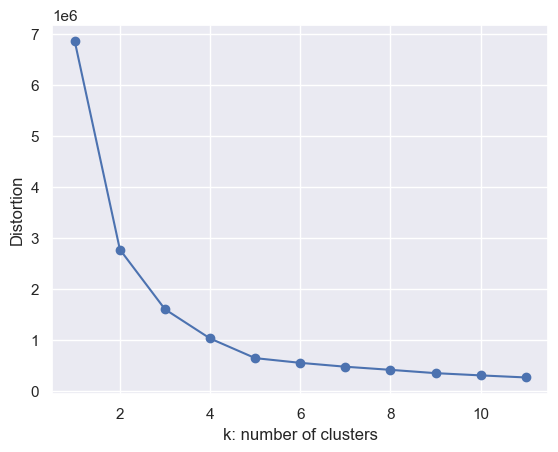

In [9]:
# Elbow method
plt.plot(kx, distortions)
plt.scatter(kx, distortions)
plt.xlabel("k: number of clusters")
plt.ylabel("Distortion")
plt.show

In [11]:
K_NUMBER = 5
dfCustomers, dist = clst.clustering(customers, predcol=predcol, usecol=usecol, clusters=K_NUMBER)

NormarlizationMethod:StandardScaler
Distortion: 637329.32


## Train test split

In [14]:
dfTransactions = pd.read_csv('./transactions_train.csv/transactions_train.csv', 
                               usecols=['t_dat', 'customer_id', 'article_id'],
                               dtype={'article_id': 'int32', 't_dat': 'string', 'customer_id': 'string'})
dfTransactions['t_dat'] = pd.to_datetime(dfTransactions['t_dat'])
dfTransactions.set_index('t_dat', inplace=True)
dfTransactions.head()

,customer_id,article_id
t_dat,,
2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001
2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023
2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004
2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003
2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004


In [16]:
dfRecent = dfTransactions.loc['2020-09-01' : '2020-09-21']
dfRecent = dfRecent.merge(dfCustomers[['customer_id', 'pred']], on='customer_id', how='inner')
dfRecent = dfRecent.groupby(['pred', 'article_id']).count().reset_index().rename(columns={'customer_id': 'counts'})
listUniBins = dfRecent['pred'].unique().tolist()
display(dfRecent, listUniBins)

,pred,article_id,counts
0,0,108775044,6
1,0,111565001,43
2,0,111586001,129
3,0,111593001,117
4,0,111609001,18
...,...,...,...
72070,4,952267001,12
72071,4,952938001,1
72072,4,953450001,3
72073,4,953763001,3


[0, 1, 2, 3, 4]

In [17]:
dict100 = {}
for uniBin in listUniBins:
    # dfTemp = dfRecent[dfRecent['age_bins'] == uniBin]
    dfTemp = dfRecent[dfRecent['pred'] == uniBin]
    dfTemp = dfTemp.sort_values(by='counts', ascending=False)
    dict100[uniBin] = dfTemp.head(100)['article_id'].values.tolist()

df100 = pd.DataFrame([dict100]).T.rename(columns={0:'top100'})

In [18]:
df100

,top100
0,"[918292001, 448509014, 909370001, 706016001, 9..."
1,"[751471043, 751471001, 896152002, 924243001, 9..."
2,"[751471043, 751471001, 915529003, 918522001, 9..."
3,"[751471001, 758034001, 448509014, 748355003, 8..."
4,"[909370001, 915526001, 924243001, 918292001, 9..."


<Axes: >

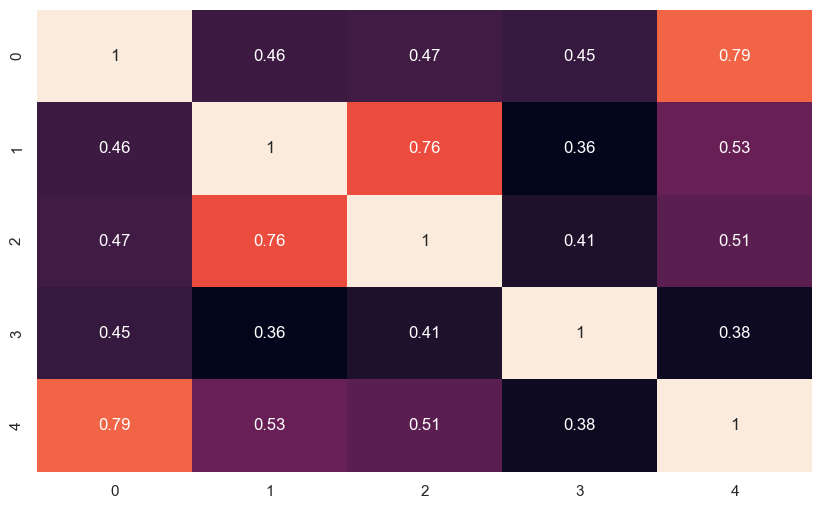

In [19]:
for index in df100.index:
    df100[index] = [len(set(df100.at[index, 'top100']) & set(df100.at[x, 'top100']))/100 for x in df100.index]

df100 = df100.drop(columns='top100')
plt.figure(figsize=(10, 6))
sns.heatmap(df100, annot=True, cbar=False)

In [22]:
df_org  = pd.read_csv('./transactions_train.csv/transactions_train.csv',
                        usecols= ['t_dat', 'customer_id', 'article_id'], 
                        dtype={'article_id': 'int32', 't_dat': 'string', 'customer_id': 'string'})

In [23]:
df_org

,t_dat,customer_id,article_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004
...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002


In [24]:
last_ts = df_org['t_dat'].max()
last_ts = (datetime.fromisoformat(last_ts) - timedelta(days=7)).strftime("%Y-%m-%d")
print(f'last day for train: {last_ts}')

last day for train: 2020-09-15


In [25]:
df_train = df_org[df_org['t_dat'] <= last_ts]
df_test = df_org[df_org['t_dat'] > last_ts]
last_ts = df_train['t_dat'].max()
print(last_ts)

2020-09-15


In [26]:
df_test["article_id"] = df_test["article_id"].astype(str)
df_test["article_id"] = df_test["article_id"].str.zfill(10)
df_test2 = df_test.groupby(['customer_id'])["article_id"].apply(list)
df_test2

customer_id
00039306476aaf41a07fed942884f16b30abfa83a2a8be...                                         [0624486001]
0003e867a930d0d6842f923d6ba7c9b77aba33fe2a0fbf...                                         [0827487003]
000493dd9fc463df1acc2081450c9e75ef8e87d5dd17ed...                 [0757926001, 0788575004, 0640021019]
000525e3fe01600d717da8423643a8303390a055c578ed...                                         [0874110016]
00077dbd5c4a4991e092e63893ccf29294a9d5c46e8501...    [0903762001, 0879189005, 0158340001, 086796600...
                                                                           ...                        
fffa67737587e52ff1afa9c7c6490b5eb7acbc439fe82b...                             [0874816003, 0911870004]
fffa7d7799eb390a76308454cbdd76e473d65b1497fbe4...                             [0861803014, 0849886010]
fffae8eb3a282d8c43c77dd2ca0621703b71e90904dfde...    [0396135007, 0817472007, 0715624050, 081747200...
fffd870c6324ad3bda24e4d6aeae221c199479086bfdfd...            

<function matplotlib.pyplot.show(close=None, block=None)>

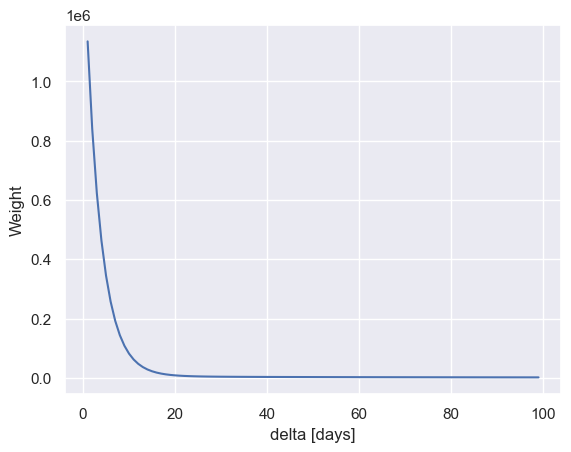

In [28]:
a, b, c, d = 2.5e4, 1.5e6, 3e-1, 1e3
#a, b, c, d = 2.5e4, 1.5e5, 2e-1, 1e3
x = np.array(range(0, 100))
y = a / np.sqrt(x) + b * np.exp(-c * x) - d
plt.plot(x, y)
plt.xlabel("delta [days]")
plt.ylabel("Weight")
plt.show

In [32]:
# 결과를 저장할 리스트들
score_k = []  # 각 Bin에 대한 mAP 스코어를 저장
num_customers = []  # 각 Bin에 대한 고객 수를 저장

# 각 Bin에 대한 작업을 수행
for uniBin in listUniBins:
    df = df_train.copy()

    # KMeans를 사용하여 데이터를 segmantation
    if str(uniBin) == 'nan':
        dfCustomersTemp = dfCustomers[dfCustomers['pred'].isnull()]
    else:
        dfCustomersTemp = dfCustomers[dfCustomers['pred'] == uniBin]
    dfCustomersTemp = dfCustomersTemp.drop(['pred'], axis=1)
    df = df.merge(dfCustomersTemp[['customer_id', 'age']], on='customer_id', how='inner')

    # 메모리를 줄이기 위한 처리
    df['customer_id'] = df['customer_id'].apply(lambda x: int(x[-16:], 16)).astype('int64')
    df['t_dat'] = pd.to_datetime(df['t_dat'])
    last_ts = df['t_dat'].max()

    # 판매량을 계산하기 위한 일주일 주기 설정
    tmp = df[['t_dat']].copy()
    tmp['dow'] = tmp['t_dat'].dt.dayofweek
    tmp['ldbw'] = tmp['t_dat'] - pd.TimedeltaIndex(tmp['dow'] - 1, unit='D')
    tmp.loc[tmp['dow'] >= 2, 'ldbw'] = tmp.loc[tmp['dow'] >= 2, 'ldbw'] + pd.TimedeltaIndex(
        np.ones(len(tmp.loc[tmp['dow'] >= 2])) * 7, unit='D')
    df['ldbw'] = tmp['ldbw'].values

    # 주간 판매량 계산
    weekly_sales = df.drop('customer_id', axis=1).groupby(['ldbw', 'article_id']).count().reset_index()
    weekly_sales = weekly_sales.rename(columns={'t_dat': 'count'})
    df = df.merge(weekly_sales, on=['ldbw', 'article_id'], how='left')
    weekly_sales = weekly_sales.reset_index().set_index('article_id')

    df['quotient'] = df['count_targ'] / df['count']
    target_sales = df.drop('customer_id', axis=1).groupby('article_id')['quotient'].sum()
    general_pred = target_sales.nlargest(N).index.tolist()
    general_pred = ['0' + str(article_id) for article_id in general_pred]
    general_pred_str = ' '.join(general_pred)
    del target_sales

    purchase_dict = {}

    tmp = df.copy()
    tmp['x'] = ((last_ts - tmp['t_dat']) / np.timedelta64(1, 'D')).astype(int)
    tmp['dummy_1'] = 1
    tmp['x'] = tmp[["x", "dummy_1"]].max(axis=1)
    tmp['y'] = a / np.sqrt(tmp['x']) + b * np.exp(-c * tmp['x']) - d
    tmp['dummy_0'] = 0
    tmp['y'] = tmp[["y", "dummy_0"]].max(axis=1)
    tmp['value'] = tmp['quotient'] * tmp['y']

    tmp = tmp.groupby(['customer_id', 'article_id']).agg({'value': 'sum'})
    tmp = tmp.reset_index()

    tmp = tmp.loc[tmp['value'] > 0]
    tmp['rank'] = tmp.groupby("customer_id")["value"].rank("dense", ascending=False)
    tmp = tmp.loc[tmp['rank'] <= 12]

    purchase_df = tmp.sort_values(['customer_id', 'value'], ascending=False).reset_index(drop=True)
    purchase_df['prediction'] = '0' + purchase_df['article_id'].astype(str) + ' '
    purchase_df = purchase_df.groupby('customer_id').agg({'prediction': sum}).reset_index()
    purchase_df['prediction'] = purchase_df['prediction'].str.strip()
    purchase_df = pd.DataFrame(purchase_df)

    sub = df_val.groupby(["customer_id"]).count()
    sub.reset_index()

    numCustomers = sub.shape[0]

    sub = sub.merge(dfCustomersTemp[['customer_id', 'age']], on='customer_id', how='inner')

    sub['customer_id2'] = sub['customer_id'].apply(lambda x: int(x[-16:], 16)).astype('int64')
    sub = sub.merge(purchase_df, left_on='customer_id2', right_on='customer_id', how='left',
                    suffixes=('','_ignored'))

    sub['prediction'] = sub['prediction'].fillna(general_pred_str)
    sub['prediction'] = sub['prediction'] + ' ' + general_pred_str
    sub['prediction'] = sub['prediction'].str.strip()
    sub['prediction'] = sub['prediction'].str[:131]
    sub = sub[['customer_id', 'prediction']]
    sub['prediction2'] = sub['prediction'].apply(lambda x: x.split())
    sub2 = sub.merge(df_val2, on='customer_id', how='left', suffixes=('article_id', 'val'))
    val_items = sub2["article_id"].tolist()
    outputs = sub2["prediction2"].tolist()
    score = mapk(val_items, outputs)
    print("mAP Score on Validation set:", score)
    print(f'prediction for {uniBin}. The shape is {sub.shape}. \n')

    score_k.append(score)
    num_customers.append(sub.shape[0])

    print('-' * 50)
print('Finished.\n')
print('=' * 50)

The shape of scope transaction for 0 is (11412280, 4). 

mAP Score on Validation set: 0.022361942717757797
prediction for 0. The shape is (24153, 3). 

--------------------------------------------------
The shape of scope transaction for 1 is (5293193, 4). 

mAP Score on Validation set: 0.026242879833257134
prediction for 1. The shape is (12170, 3). 

--------------------------------------------------
The shape of scope transaction for 2 is (5991257, 4). 

mAP Score on Validation set: 0.025164498473697443
prediction for 2. The shape is (12797, 3). 

--------------------------------------------------
The shape of scope transaction for 3 is (681773, 4). 

mAP Score on Validation set: 0.02535710283780039
prediction for 3. The shape is (939, 3). 

--------------------------------------------------
The shape of scope transaction for 4 is (8169510, 4). 

mAP Score on Validation set: 0.022204887395586043
prediction for 4. The shape is (18925, 3). 

--------------------------------------------

# Evaluation

## NCF

In [29]:
def ap_k(actual, predicted, k):
    """
    Computes the average precision at k.
    This function computes the average prescision at k between two lists of
    items.
    Parameters
    ----------
    actual : list
             A list of elements that are to be predicted (order doesn't matter)
    predicted : list
                A list of predicted elements (order does matter)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The average precision at k over the input lists
    """
    if len(predicted)>k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    if not actual:
        return 0.0

    return score / min(len(actual), k)


def ndcg_k(y_true, y_pred, k):
    dcg = 0
    N = len(y_true)
    if N == 0:
        return 0
    for idx, item in enumerate(y_pred[:k], start=1):
        dcg += (2 ** (item in y_true) - 1) / np.log2(1 + idx)
    idcg = sum(1 / np.log2(1 + i) for i in range(1, N + 1))
    return dcg / idcg

def measure_rank_metrics(test_set, k):
    
    group_cols = ['customer_id']
    explode_cols = ['article_id', 'target']
    data_full = test_set[group_cols + explode_cols +['predicted_article_id']].explode(explode_cols)
    data = data_full.sort_values(group_cols, ascending=False)
    data[f'rn'] = data.groupby(group_cols).cumcount()+1
    data = data[(data.rn <= k) | (data.target == 1)]

    data_group = data.groupby(group_cols)
    map_all = round(data_group.apply(
                lambda x: ap_k(x.loc[x['target'] == 1, 'article_id'].tolist(), 
                              x['predicted_article_id'].values[0][:k], k)).values.mean(), 5)

    ndcg_all = round(data_group.apply(
                lambda x: ndcg_k(x.loc[x['target'] == 1, 'article_id'].tolist(), 
                               x['predicted_article_id'].values[0][:k], k)).values.mean(), 5)
    
    return map_all, ndcg_all

def measure_metrics(test_set, k=10):
    metrics = {}
    map_all, ndcg_all = measure_rank_metrics(test_set, k)
    metrics['map_all'] = map_all
    metrics['ndcg_all'] = ndcg_all
    
    return metrics

In [56]:
measure_metrics(test_grouped, 12)

{'map_all': 0.24425, 'ndcg_all': 0.39383}

## K-means

In [34]:
def apk(actual, predicted, k=12):
    if len(predicted)>k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i, p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    if not actual:
        return 0.0

    return score / min(len(actual), k)

def mapk(actual, predicted, k=12):
    return np.mean([apk(a,p,k) for a,p in zip(actual, predicted)])

In [36]:
score_list = np.array(score_k)
num_list = np.array(num_customers)

total = (score_list * num_list).sum()
count = num_list.sum()
print("mAP Score on Test set:", total/count)

mAP Score on Test set: 0.023564185181010232
